<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---

In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import io
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu

%matplotlib inline

### Preprocessing

Perform some image smoothing to reduce image noise

In [3]:
image = io.imread("../images/nuclei-dapi.tif")

### Generate candidates for markers

In [4]:
threshold = threshold_otsu(image)
print(threshold) 
binary = ~(image <= threshold)

33


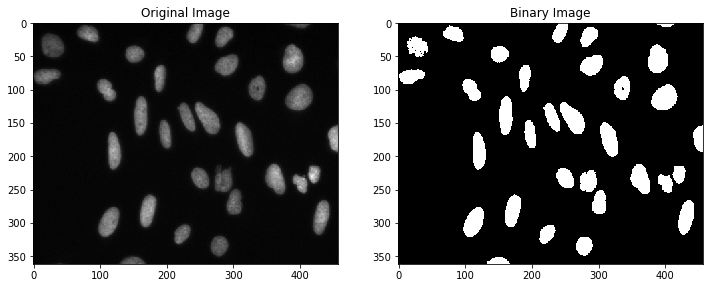

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(binary, cmap='gray')
ax[1].set_title('Binary Image')
plt.show()

In [6]:
distance = ndi.distance_transform_edt(binary)

#### Watershed Parameters: 

- threshold_m: We set this threshold to place the markers near the peaks of the distance transform
- footprintsize: Size of the local neibourhood when finding local maxima 

In [9]:
threshold_m = 1.5*threshold_otsu(distance)
footprintsize = 31

In [10]:
coords = peak_local_max(distance, threshold_abs=threshold_m, 
                        footprint=np.ones((footprintsize, footprintsize)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
print(coords.shape)
mask[tuple(coords.T)] = True

(1344, 2)


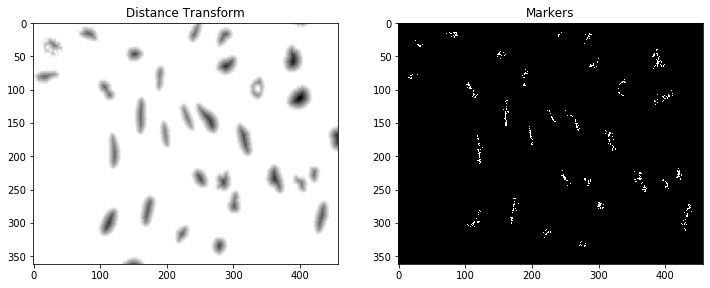

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
ax[0].imshow(-distance, cmap='gray')
ax[0].set_title('Distance Transform')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Markers')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Explore:</b> The marker image is a critical input to the watershed algorithm. Modify the paramters threshold_m and footprint_size to modify the maker image and observe how it will affect the final segmentation. 
</div>

### Use the watershed algorithm to generate a label image

In [12]:
markers, _ = ndi.label(mask)
labels1 = watershed(-distance, markers, mask=binary, compactness=0)
labels2 = watershed(-distance, markers, mask=binary, compactness=.01)

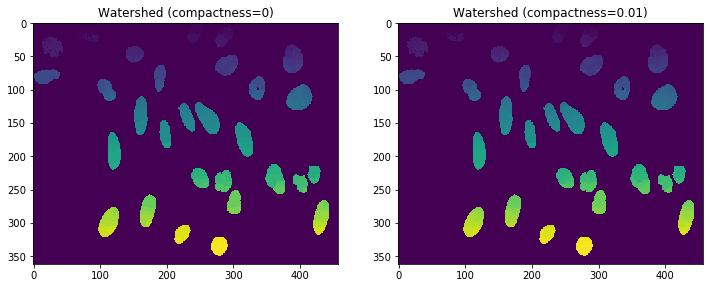

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
ax[0].imshow(labels1)
ax[0].set_title('Watershed (compactness=0)')
ax[1].imshow(labels2)
ax[1].set_title('Watershed (compactness=0.01)')
plt.show()